# Library Yang Dibutuhkan

In [ ]:
import numpy as np  # Import pustaka NumPy dan beri alias "np".
import matplotlib.pyplot as plt  # Import pustaka Matplotlib dan beri alias "plt".
import tensorflow as tf  # Import pustaka TensorFlow dan beri alias "tf".
from tensorflow.keras.layers import Input, Dense  # Import modul Input dan Dense dari pustaka Keras.
from tensorflow.keras.models import Model  # Import kelas Model dari pustaka Keras.

# Load Data

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load data
mnist = tf.keras.datasets.mnist #menggunakan dataset yang berisi gambar angka tulisan 0 - 9
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() #Memuat data pelatihan

# Preprocess the data
training_images = training_images.reshape((60000, 28, 28, 1)).astype('float32') / 255 #menyesuaikan bntk data pelatihan ke piksel rentang 0-1
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255 #Menyesuaikan bntk data yang sama

# Create a simple convolutional neural network (CNN) model
model = models.Sequential() #membuat sequaential menggunakan pustaka keras
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model #Mengompilasi model dengan
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary() #mencetak ringkasan arsitektur


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                         

In [ ]:
train_shape = training_images.shape  # Menghitung dan menyimpan bentuk data gambar latih dalam variabel "train_shape".
test_shape = test_images.shape  # Menghitung dan menyimpan bentuk data gambar uji dalam variabel "test_shape".

print(f"Terdapat {train_shape[0]} contoh dengan bentuk ({train_shape[1]}, {train_shape[2]}, {train_shape[3]}) pada data gambar latih")  # Mencetak informasi tentang jumlah contoh (gambar) dalam data gambar latih beserta dimensi gambar (tinggi, lebar, dan saluran warna).
print(f"Terdapat {test_shape[0]} contoh dengan bentuk ({test_shape[1]}, {test_shape[2]}, {test_shape[3]}) pada data gambar uji") # Mencetak informasi tentang jumlah contoh (gambar) dalam data gambar latih beserta dimensi gambar (tinggi, lebar, dan saluran warna).

Terdapat 60000 contoh dengan bentuk (28, 28, 1) pada data gambar latih
Terdapat 10000 contoh dengan bentuk (28, 28, 1) pada data gambar uji


# Data Preprarasion

In [ ]:
import numpy as np
import tensorflow as tf

# Load data
mnist = tf.keras.datasets.mnist #menggunakan dataset yang berisi gambar angka tulisan 0 - 9
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() #Memuat data pelatihan

# Normalisasi nilai piksel dengan membagi dengan 255
training_images = training_images / 255.0
test_images = test_images / 255.0

# Reshape
training_images = np.reshape(training_images, (training_images.shape[0], 784)) #mengubah bntk array data dengan panjang 784 piksel 28x28
test_images = np.reshape(test_images, (test_images.shape[0], 784))



# Membangun Model

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

# Definisi model autoencoder
def build_autoencoder(input_shape=(784,)): #menerima argumen
    # Input layer
    inputs = Input(shape=input_shape)

    # Encoder mengurangi dimensi
    h_encode = Dense(500, activation='relu')(inputs)
    h_encode = Dense(200, activation='relu')(h_encode)
    h_encode = Dense(100, activation='relu')(h_encode)
    h_encode = Dense(60, activation='relu')(h_encode)

    # Representasi kode (coded)
    coded = Dense(32, activation='relu')(h_encode)

    # Decoder meningkatkan dimensi
    h_decode = Dense(60, activation='relu')(coded)
    h_decode = Dense(100, activation='relu')(h_decode)
    h_decode = Dense(200, activation='relu')(h_decode)
    h_decode = Dense(500, activation='relu')(h_decode)

    # Output layer dengan dropout dan aktivasi 'tanh'
    outputs = Dense(784, activation='tanh')(h_decode)
    outputs = Dropout(0.2)(outputs)  # Dropout untuk mencegah overfitting

    # Membuat model autoencoder
    autoencoder = Model(inputs, outputs)

    return autoencoder

# Membangun model autoencoder
autoencoder = build_autoencoder()




In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

inputs = Input(shape=(784,))

# Encoder #mangurangi dimensi
h_encode = Dense(500, activation='relu')(inputs)
h_encode = Dense(200, activation='relu')(h_encode)
h_encode = Dense(100, activation='relu')(h_encode)
h_encode = Dense(60, activation='relu')(h_encode)

# Representasi kode (coded)
coded = Dense(32, activation='relu')(h_encode)

# Decoder #menambahkan dimensi
h_decode = Dense(60, activation='relu')(coded)
h_decode = Dense(100, activation='relu')(h_decode)
h_decode = Dense(200, activation='relu')(h_decode)
h_decode = Dense(500, activation='relu')(h_decode)

# Lapisan output dengan dropout dan aktivasi 'tanh'
outputs = Dense(784, activation='tanh')(h_decode)
outputs = Dropout(0.2)(outputs)  # Dropout untuk mencegah overfitting

# Membuat model autoencoder
autoencoder = Model(inputs, outputs)

# Kompilasi model
autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

# Pelatihan model
autoencoder.fit(training_images, training_images,
                epochs=25,
                batch_size=300,
                shuffle=True,
                validation_data=(test_images, test_images))

Epoch 1/25
200/200 [==============================] - 17s 11ms/step - loss: 0.0600 - mse: 0.0600 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 2/25
200/200 [==============================] - 1s 6ms/step - loss: 0.0441 - mse: 0.0441 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 3/25
200/200 [==============================] - 1s 6ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0249 - val_mse: 0.0249
Epoch 4/25
200/200 [==============================] - 1s 6ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0224 - val_mse: 0.0224
Epoch 5/25
200/200 [==============================] - 1s 6ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 6/25
200/200 [==============================] - 1s 6ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 7/25
200/200 [==============================] - 1s 6ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 8/25
200/200 [==============================] - 2s 8ms/step - loss: 

# Prediksi dan Visualisasi

In [ ]:
predicted_images = autoencoder.predict(test_images) #melakukan prediksi dari program sebelumnya


313/313 [==============================] - 1s 3ms/step


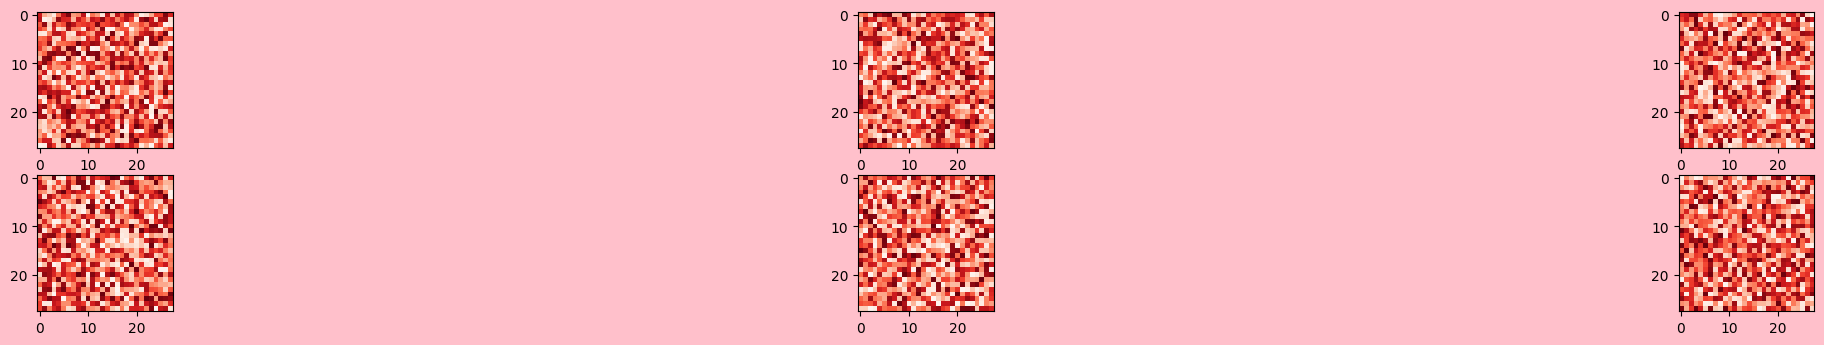

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy data (gantilah dengan data sesuai kebutuhan)
test_images = np.random.rand(3, 28, 28)
predicted = np.random.rand(3, 28, 28)

n = 3  # Jumlah gambar yang akan divisualisasikan

plt.figure(figsize=(30, 6), facecolor='pink')  # Membuat gambar (figure) dengan lebar 30 dan tinggi 6, serta background warna pink

# Loop untuk memvisualisasikan gambar-gambar
for i in range(n):
    ax = plt.subplot(3, n, i + 1)  # Membuat subplot pertama (baris pertama)
    plt.imshow(test_images[i].reshape(28, 28), cmap='Reds')  # Menampilkan gambar asli dari data uji dengan peta warna 'Reds'
    ax.get_xaxis().set_visible(True)  # Menampilkan sumbu x
    ax.get_yaxis().set_visible(True)  # Menampilkan sumbu y

    ax = plt.subplot(3, n, i + 1 + n)  # Membuat subplot kedua (baris kedua)
    plt.imshow(predicted[i].reshape(28, 28), cmap='Reds')  # Menampilkan gambar rekonstruksi dari model autoencoder dengan peta warna 'Reds'
    ax.get_xaxis().set_visible(True)  # Menampilkan sumbu x
    ax.get_yaxis().set_visible(True)  # Menampilkan sumbu y

plt.show()  # Menampilkan gambar-gambar yang telah divisualisasikan

